<a href="https://colab.research.google.com/github/fresilva-ai/public.ai/blob/main/vit_cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar las bibliotecas necesarias
!pip install timm torch torchvision

In [ ]:
# Importar las bibliotecas
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from timm.models.vision_transformer import vit_base_patch16_224
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified


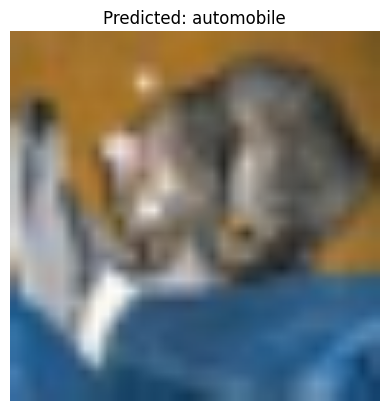

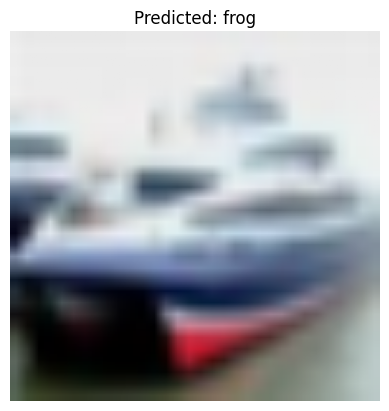

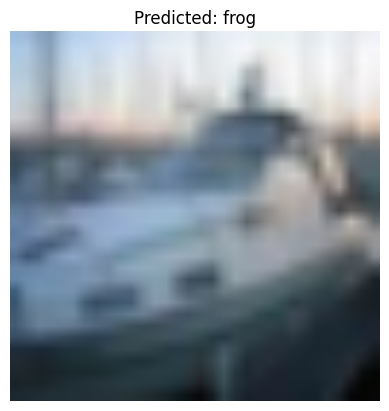

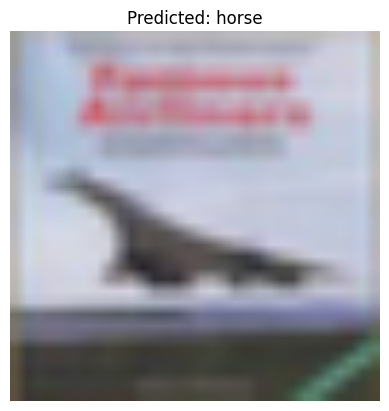

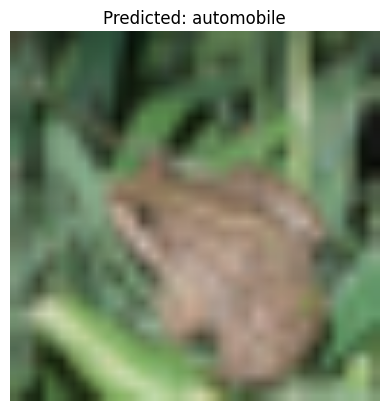

In [14]:
# Configurar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definir las clases de CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Descargar y preparar el dataset CIFAR-10
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cargar el modelo ViT preentrenado y ajustar la capa final para 10 clases
model = vit_base_patch16_224(pretrained=True)
model.head = torch.nn.Linear(model.head.in_features, len(class_names))  # Ajustar para CIFAR-10
model = model.to(device)
model.eval()  # Modo evaluación

# Obtener un lote de imágenes del conjunto de prueba
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Mover las imágenes al dispositivo
images = images.to(device)

# Realizar predicciones
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)  # Obtener las clases predichas

# Mostrar imágenes y predicciones válidas
num_images_to_show = min(5, len(predicted), images.size(0))

for i in range(num_images_to_show):
    # Convertir la imagen actual a formato visualizable
    img = images[i].cpu() / 2 + 0.5  # Desnormalizar
    img = img.numpy().transpose((1, 2, 0))  # Cambiar a formato HWC para matplotlib

    # Título con la predicción
    title = f"Predicted: {class_names[predicted[i].item()]}"

    # Mostrar la imagen
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()